While a lot of powerful tools are built into languages like Python, even more tools exist in libraries.

In order to load the elevation data, we need to import a library called NumPy. You should use this library if you want to do fancy things with numbers, especially if you have matrices or arrays. We can load NumPy using:

In [1]:
import numpy

Importing a library is like getting a piece of lab equipment out of a storage locker and setting it up on the bench. Libraries provide additional functionality to Python, much like a new piece of equipment adds functionality to a lab space. Once we’ve loaded the library, we can use a tool inside that library to read the data file:

In [2]:
numpy.loadtxt('topo.asc', delimiter=',')

array([[ 3198.8391,  3198.123 ,  3197.1584, ...,  2583.3293,  2585.4368,
         2589.1079],
       [ 3198.3306,  3197.5242,  3196.4102, ...,  2582.6992,  2584.9167,
         2587.801 ],
       [ 3197.9968,  3196.9197,  3195.7188, ...,  2581.8328,  2583.8159,
         2586.0325],
       ..., 
       [ 3325.1509,  3334.7822,  3343.3154, ...,  2780.8191,  2769.3235,
         2762.373 ],
       [ 3325.0823,  3335.0308,  3345.4963, ...,  2775.3345,  2765.7131,
         2759.6555],
       [ 3326.6824,  3336.5305,  3348.1343, ...,  2769.7661,  2762.5242,
         2756.6877]])

The expression `numpy.loadtxt(...)` is a function call. It asks Python to run the function `loadtxt` that exists within the library `numpy`. This dotted notation, with the syntax `thing.component`, is used everywhere in Python to refer to parts of things.

The function call to `numpy.loadtxt` has two parameters: the name of the file we want to read and the delimiter that separates values on a line. Both need to be character strings (or strings for short) so we write them in quotes.

Within the Jupyter iPython notebook, pressing Shift+Enter runs the commands in the selected cell. Because we haven't told iPython what to do with the output of `numpy.loadtxt`, the notebook just displays it on the screen. In this case, that output is the data we just loaded. By default, only a few rows and columns are shown (with `...` to omit elements when displaying big arrays).

Our call to `numpy.loadtxt` read the file but didn’t save it to memory. In order to access the data, we need to assign the values to a variable. A variable is just a name that refers to an object. Python’s variables must begin with a letter and are case sensitive. We can assign a variable name to an object using `=`.

## Naming objects {.callout}

What happens when a function is called but the output is not assigned to a variable is a bit more complicated than simply not saving it. The call to `numpy.loadtxt` read the file and created an object in memory that contains the data, but because we didn't assign it to a variable name, there is no way for us to call this object. While this difference might seem irrelevant (and, in practice, it is!), it will be important to consider how variable names are assigned to objects when we talk about mutable and immutable objects later on.

A good explanation of how Python handles variables and objects can be found here: https://jeffknupp.com/blog/2012/11/13/is-python-callbyvalue-or-callbyreference-neither/

Let’s re-run numpy.loadtxt and assign the output to a variable name:

In [3]:
topo = numpy.loadtxt('topo.asc', delimiter=',')

This command doesn’t produce any visible output. If we want to see the data, we can print the variable’s value with the command `print`:

In [4]:
print topo

[[ 3198.8391  3198.123   3197.1584 ...,  2583.3293  2585.4368  2589.1079]
 [ 3198.3306  3197.5242  3196.4102 ...,  2582.6992  2584.9167  2587.801 ]
 [ 3197.9968  3196.9197  3195.7188 ...,  2581.8328  2583.8159  2586.0325]
 ..., 
 [ 3325.1509  3334.7822  3343.3154 ...,  2780.8191  2769.3235  2762.373 ]
 [ 3325.0823  3335.0308  3345.4963 ...,  2775.3345  2765.7131  2759.6555]
 [ 3326.6824  3336.5305  3348.1343 ...,  2769.7661  2762.5242  2756.6877]]


Using its variable name, we can ask that type of object `topo` refers to:

In [5]:
print type(topo)

<type 'numpy.ndarray'>


The function `type` tells us that the variable name `topo` currently refers to an N-dimensional array created by the NumPy library. The file we imported contains elevation data (in meters, 2 degree spacing) for an area along the Front Range of Colorado. We can get the shape of the array:

In [6]:
print topo.shape

(500, 500)


This tells us that `topo` has 500 rows and 500 columns. The object of type `numpy.ndarray` that the variable `topo` refers to has some information associated with it called attributes. This extra information describes the data in the same way an adjective describes a noun. The command `topo.shape` calls the `shape` attribute of the object assigned to `topo` that describes its dimensions. We use the same dotted notation for the attributes of objects that we use for the functions inside libraries because they have the same part-and-whole relationship.

## len() and other built-in functions {.callout}

The function `len()` returns the length of the longest axis of a sequence (a numpy array, a list, etc.). Because it is a built-in function, it is always available for the Python interpreter and doesn't have to be imported. The function `type()` is another built in function. You can read about them here: https://docs.python.org/2/library/functions.html

## Who's who in the memory {.callout}

You can use the whos command at any time to see what variables you have created and what modules you have loaded into the computers memory. As this is an IPython command, it will only work if you are in an IPython terminal or the Jupyter Notebook.

In [7]:
whos

Variable   Type       Data/Info
-------------------------------
numpy      module     <module 'numpy' from '//a<...>ages/numpy/__init__.pyc'>
topo       ndarray    500x500: 250000 elems, type `float64`, 2000000 bytes (1 Mb)


## Plotting

Rasters are just big arrays of values. In the case of DEMs, those values are elevation. It's very hard to get a good sense of what this landscape looks like by looking directly at the data. This information is better conveyed through plots and graphics.

Data visualization deserves an entire lecture (or course) of its own, but we can explore a few features of Python's `matplotlib` library here. While there is no "official" plotting library in Python, this package is the de facto standard.

We start by importing the `pyplot` module from `matplotlib`:

In [22]:
import matplotlib.pyplot

## Some IPython magic {.callout}

If you're using an IPython / Jupyter notebook,
you'll need to execute the following command
in order for your matplotlib images to appear
in the notebook instead of a separate window:

In [21]:
%matplotlib inline

The `%` indicates an IPython magic function -
a function that is only valid within the notebook environment.
Note that you only have to execute this function once per notebook.

The function `imshow` within `matplotlib.pyplot` displays arrays as an image:

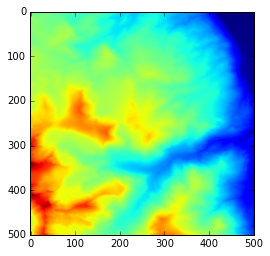

In [23]:
matplotlib.pyplot.imshow(topo)

The areas in blue are lower than the areas in red. We can plot this image again and add a colorbar:

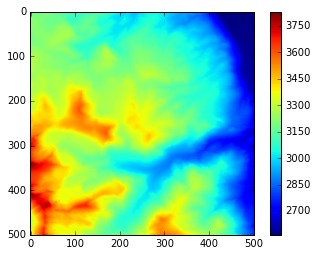

In [24]:
matplotlib.pyplot.imshow(topo)
matplotlib.pyplot.colorbar()

## Indexing

We can access individual values in an array by providing an index in square brackets:

In [9]:
print 'elevation at the corner of topo:', topo[0,0], 'meters'

elevation at the corner of topo: 3198.8391 meters


In [10]:
print 'elevation at some random spot in topo:', topo[137,65], 'meters'

elevation at some random spot in topo: 3251.1179 meters


When referring to values in a two dimensional array, the indices are ordered `[row,column]`. The expression `topo[137, 65]` may not surprise you but `topo[0,0]` might. Programming languages like Fortran and MATLAB start counting at 1 because that’s what (most) humans have done for thousands of years. Languages in the C family (including C++, Java, Perl, and Python) count from 0 because that’s simpler for computers to do. So if we have an M×N array in Python, the indices go from 0 to M-1 on the first axis (rows) and 0 to N-1 on the second (columns). In MATLAB, the same array (or matrix) would have indices that go from 1 to M and 1 to N. Zero-based indexing takes a bit of getting used to, but one way to remember the rule is that the index is how many steps we have to take from the start to get to the item we want.

Python also allows for negative indices to refer to the position of elements with respect to the end of each axis. An index of -1 refer to the last item in a list, -2 is the second to last, and so on. Since index `[0,0]` is the upper left corner of an array, index `[-1,-1]` therefore the lower right corner of the array.

In [11]:
print topo[-1,-1]

2756.6877


## In the Corner {.callout}

It may also surprise you that Python displays an array with the element with index [0, 0] in the upper left corner rather than the lower left. This is consistent with the way mathematicians draw matrices but different from Cartesian coordinates. The indices are (row, column) instead of (column, row) for the same reason, which can be confusing when plotting data.

## Slicing

A command like `topo[0,0]` selects a single element in the array `topo`. Indices can also be used to slice sections of the array. For example, we can select the top left quarter of the array like this:

In [12]:
print topo[0:5, 0:5]

[[ 3198.8391  3198.123   3197.1584  3196.2017  3193.8813]
 [ 3198.3306  3197.5242  3196.4102  3194.7559  3191.9763]
 [ 3197.9968  3196.9197  3195.7188  3193.3855  3190.5371]
 [ 3198.054   3196.7031  3194.9573  3192.4451  3189.5288]
 [ 3198.3289  3196.9111  3195.335   3192.7874  3190.0085]]


The slice `[0:5]` means "Start at index 0 and go along the axis up to, but not including, index 5".

We don’t need to include the upper or lower bound of the slice if we want to go all the way to the edge. If we don’t include the lower bound, Python uses 0 by default; if we don’t include the upper bound, the slice runs to the end of the axis. If we don’t include either (i.e., if we just use ‘:’), the slice includes everything:

In [32]:
print topo[:len(topo)/2, len(topo)/2:]

[[ 3008.1116  3012.2922  3015.3018 ...,  2583.3293  2585.4368  2589.1079]
 [ 3009.9558  3014.0007  3016.5647 ...,  2582.6992  2584.9167  2587.801 ]
 [ 3010.8604  3014.1228  3016.7412 ...,  2581.8328  2583.8159  2586.0325]
 ..., 
 [ 3370.0918  3368.5371  3366.7148 ...,  2687.8396  2682.4326  2676.8521]
 [ 3370.478   3368.7561  3366.8923 ...,  2685.9941  2681.2888  2676.9924]
 [ 3371.2021  3369.3376  3367.3677 ...,  2687.7014  2685.5146  2683.1936]]


## Point elevations {.challenge}

Use indexing to answer the following questions and check your answers against the plot of the data:

* Is the NW corner of the region higher than the SW corner? What's the elevation difference?
* What's the elevation difference between the NE corner and the SE corner?
* What's the elevation at the center of the region shown in our data?


## Slicing strings {.challenge}

Indexing and slicing behave the same way for any type of sequence, including numpy arrays, lists, and strings. Create a new variable called `text` and assign it the string "The quick brown fox jumped over the lazy dog." (include the quotes so Python recognizes it as a string). Then use slicing and the `print` statement to create these sentences (note capitalization and punctuation!):

* the lazy dog.
* The fox jumped over the dog
* The lazy fox jumped over the quick brown dog.

## Plotting smaller regions {.challenge}

Use the function `imshow` from `matplotlib.pyplot` to make one plot showing the northern half of the region and another showing the southern half.

Next try making four separate plots showing each quarter of the region separately.

## Non-square arrays {.challenge}

We've been using `len(topo)/2` as both the row and column indices of the center point in the array `topo`. This doesn't work with an array that's not square (has different height and width).

* Take a (small) slice of the array `topo` and assign it to a new variable. Make this new array have a height longer than its width, and make both the height and width even numbers (4 x 6 is a good size) (Hint: `topo.shape` gives the number of rows and columns in `topo`. The function `len(topo)` returns the length of the longest axis).

* Access the center point of your new array. Write the indices using variables, not numbers (ie. don't write `t[2,3]`) (Hint: instead of using `len()`, assign the output of `shape` to a variable and use indexing). Are you *really* pointing to the center of your array? How far off is it?

## Odd-sized arrays {.challenge}

Both the array `topo` and the one you created above have even numbers of rows and columns so the output of `width/2` and `height/2` were both whole numbers (and therefore valid indices). *Mysteriously*, `len(topo)/2` would work as an index even if the array `topo` had odd numbers of rows and columns. Let's test it out.

* Take a second slice of `topo` that is just one row and column larger than the one you made previously. Check its shape and print the value at the center of the array using indices like `width/2` and `height/2`. Does this work? *Should* this work?

* Compare the actual indices of the center point of this array and the indices you would calculate by dividing its width and height by 2. Is division in Python behaving like division in the real world? (Hint: If an array has a width and height that are odd numbers, what should the value of `width/2` be?).

* Test the behavior of division (using `/`) in Python by trying various even and odd whole numbers and decimals as both the nominator and denominator.

## Integers and floats {.callout}

In the real world, dividing an odd number by 2 results in a number with a decimal point (ie. half of 7 is 3.5). In Python, though, this operation gives a different answer:

In [55]:
print '7/2 =', 7/2

7/2 = 3


In Python 2.x, diving one whole number (the number 7) by another whole number (the number 2) always results in a whole number. If either number is a decimal, division behaves as expected and returns a decimal:

In [59]:
print '7.0000000001/2 =', 7.0000000001/2

7.0000000001/2 = 3.50000000005


For computers, integers (whole numbers) and floats (or floating point numbers, decimals) are object of different [type](reference.html#type) and sometimes behave differently:

In [60]:
print '7 is an integer:', type(7)
print '7.0000000001 is a float:', type(7.0000000001)

7 is an integer: <type 'int'>
7.0000000001 is a float: <type 'float'>


While this might seem strange and unnecessarily annoying, some programming languages use integer division for historical reasons: integers take up less space in memory and integer operations were much faster on early machines. This behavior can easily introduce bugs into your code but it is actually useful in a lot of situations (Python 3.x does not use integer division by default but returns a float when appropriate).

Whole numbers are treated as floats if they have decimal point:

In [64]:
print '7 is', type(7)
print '-' * 20
print '7. is', type(7.)
print '7.0 is', type(7.0)

7 is <type 'int'>
--------------------
7. is <type 'float'>
7.0 is <type 'float'>


The integer assigned to a variable can be used as a float through **casting**:

In [67]:
type_int = 7
type_float = float(type_int)

print 'type_int is', type(type_int)
print 'float(type_int) is', type(type_float)

type_int is <type 'int'>
float(type_int) is <type 'float'>


Casting doesn't permanently change the value of the original object, though:

In [69]:
print 'type_int/2 =', type_int/2
print 'float(type_int)/2 =', float(type_int)/2

type_int/2 = 3
float(type_int)/2 = 3.5


## Numerical operations on arrays

We can perform basic mathematical operations on each individual element of a NumPy array. We can create a new array with elevations in feet:

In [25]:
topo_in_feet = topo * 3.2808
print 'Elevation in meters:', topo[0,0]
print 'Elevation in feet:', topo_in_feet[0,0]

Elevation in meters: 3198.8391
Elevation in feet: 10494.7513193


Arrays of the same size can also be used for arithmatic operations:

In [26]:
double_topo = topo + topo
print 'Double topo:', double_topo[0,0], 'meters'

Double topo: 6397.6782 meters


We can also perform statistical operations on arrays:

In [27]:
print 'Mean elevation:', topo.mean(), 'meters'

Mean elevation: 3153.62166407 meters


## Methods vs. attributes {.callout}

`mean` is a method that belongs to the array `topo`, i.e., it is a function that belongs to `topo` just like the attribute `shape` does. When we call `topo.mean()`, we are asking `topo` to calculate its mean value. Because it is a function, we need to include parenthesis in the command. A call to `topo.shape` doesn't include parenthesis because attributes are objects, not functions.

Python will kindly tell us if we mix up the parentheses:

In [28]:
topo.mean

<function mean>

In [29]:
topo.shape()

TypeError: 'tuple' object is not callable

NumPy arrays have many other useful methods:

In [30]:
print 'Highest elevation:', topo.max(), 'meters'
print 'Lowest elevation:', topo.min(), 'meters'

Highest elevation: 3831.2617 meters
Lowest elevation: 2565.0293 meters


We can also call methods on slices of the array:

In [34]:
half_len = int(len(topo) / 2)

print 'Highest elevation of NW quarter:', topo[:half_len, :half_len].max(), 'meters'

print 'Highest elevation of SE quarter:', topo[half_len:, half_len:].max(), 'meters'

Highest elevation of NW quarter: 3600.709 meters
Highest elevation of SE quarter: 3575.3262 meters


Methods can also be used along individual axes (rows or columns) of an array. If we want to see how the mean elevation changes with longitude (E-W), we can use the method along `axis=0`:

In [ ]:
print topo.mean(axis=0)

To see how the mean elevation changes with latitude (N-S), we can use `axis=1`:

In [ ]:
print topo.mean(axis=1)

## Plotting, take two

It's hard to get a sense of how the topography changes across the landscape from these big tables of numbers. A simpler way to display this information is with line plots.

We are again going to use the `matplotlib` package for data visualization. Since we imported the `matplotlib.pyplot` library once already, those tools are available and can be called within Python. As a review, though, we are going to write every step needed to load and plot the data.

We use the function `plot` to create two basic line plots of the topography:

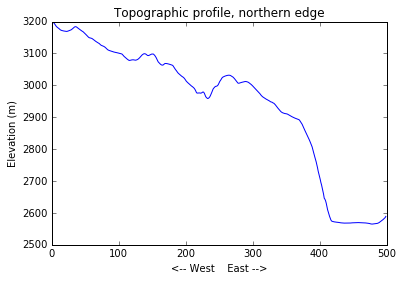

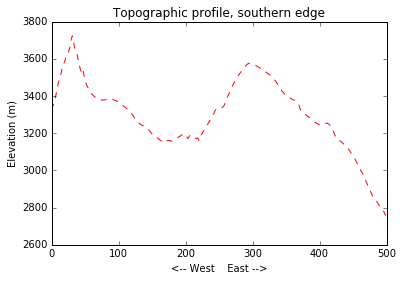

In [78]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

topo = np.loadtxt('topo.asc', delimiter=',')

plt.plot(topo[0,:])
plt.title('Topographic profile, northern edge')
plt.ylabel('Elevation (m)')
plt.xlabel('<-- West    East -->')
plt.show()

plt.plot(topo[-1,:], 'r--')
plt.title('Topographic profile, southern edge')
plt.ylabel('Elevation (m)')
plt.xlabel('<-- West    East -->')
plt.show()

> ## Scientists dislike typing {.callout}
>
> We will always use the syntax `import numpy` to import NumPy.
> However, in order to save typing, it is
> [often suggested](http://www.scipy.org/getting-started.html#an-example-script)
> to make a shortcut like so: `import numpy as np`.
> If you ever see Python code using a NumPy function with `np`
> (for example, `np.loadtxt(...)`), it's because they've used this shortcut.

To better compare these profiles, we can plot them as separate lines in a single figure using the argument `hold=True`, This will force all subsequent calls to `plt.plot` to use the same axes (until it reaches `plt.show()`):

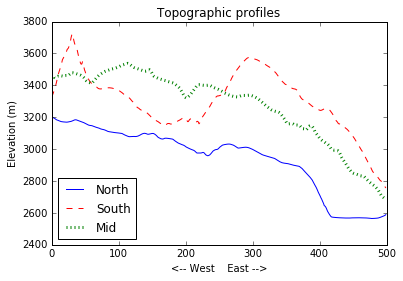

In [89]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

topo = np.loadtxt('topo.asc', delimiter=',')

plt.plot(topo[0,:], hold=True, label='North')

plt.plot(topo[-1,:], 'r--', label='South')

plt.plot(topo[len(topo)/2,:], 'g:', linewidth=3, label='Mid')

plt.title('Topographic profiles')
plt.ylabel('Elevation (m)')
plt.xlabel('<-- West    East -->')
plt.legend(loc = 'lower left')

plt.show()

> ## Make your own plots {.challenge}
>
> Create three separate plots showing how the maximum (`numpy.max()`), minimum (`numpy.min()`), and mean (`numpy.mean()`) elevation changes with longitude. Label the axes and include a title for each of the plots (Hint: use `axis=0`).
>
> Convert the separate plots into a single plot that includes all three statistics (using `hold=True`). Create a legend.


> ## Subplots {.challenge}
>
> We often want to arrange separate plots in layouts with multiple rows and columns. The script below uses subplots to show the elevation profile at the western edge, the mid longitude, and eastern edge of the region. Subplots can be a little weird because they require the axes to be defined before plotting. Type (don't copy-past!) the code below to get a sense of how it works.
>
>This script uses a number of new commands. The function `plt.figure()`
>creates a space into which we will place the three plots. The parameter `figsize`
>tells Python how big to make this space. Each subplot is placed into the figure using
>the `subplot` command. The `subplot` command takes 3 parameters: the first denotes
>the total number of rows of subplots in the figure, the second is
>the total number of columns of subplots in the figure, and the final parameters identifies the position of the subplot in the grid. The axes of each subplot are called with different variable (axes1, axes2,
>axes3, axes4). Once a subplot is created, the axes can be labeled using the
>`set_xlabel()` (or `set_ylabel()`) method. `plt.show()` is called after the entire figure is set up.


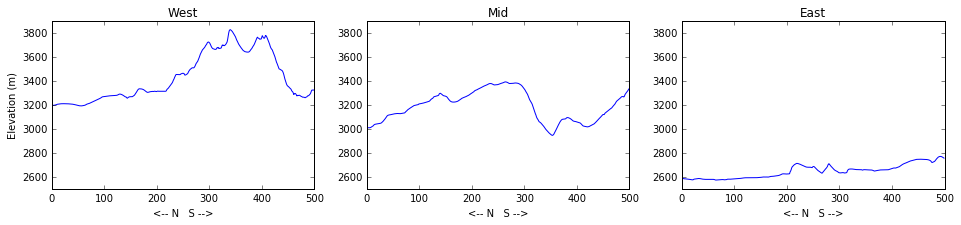

In [112]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

topo = np.loadtxt('topo.asc', delimiter=',')

fig = plt.figure(figsize=(16.0, 3.0))

axes1 = fig.add_subplot(1,3,1)
axes2 = fig.add_subplot(1,3,2)
axes3 = fig.add_subplot(1,3,3)

axes1.plot(topo[:,0])
axes1.set_ylim([2500,3900])
axes1.set_ylabel('Elevation (m)')
axes1.set_xlabel('<-- N   S -->')
axes1.set_title('West')

axes2.plot(topo[:,len(topo)/2])
axes2.set_ylim([2500,3900])
axes2.set_xlabel('<-- N   S -->')
axes2.set_title('Mid')

axes3.plot(topo[:,-1])
axes3.set_ylim([2500,3900])
axes3.set_xlabel('<-- N   S -->')
axes3.set_title('East')

plt.show(fig)

## Subplots of DEMs {.challenge}

Make a 2x2 grid of subplots that use the function `imshow` to display each quarter of the dataset (ie. split down the middle in both x and y).

* Don't label axes or add a colorbar. It can be tricky.
* To set the range of colors for one subplot, include the arguments `vmin` and `vmax` in `imshow` like this:

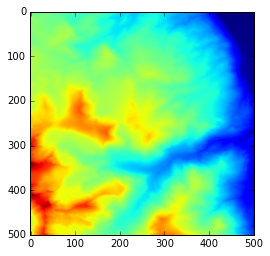

In [127]:
vmin = topo.min()
vmax = topo.max()

plt.imshow(topo, vmin=vmin, vmax=vmax)

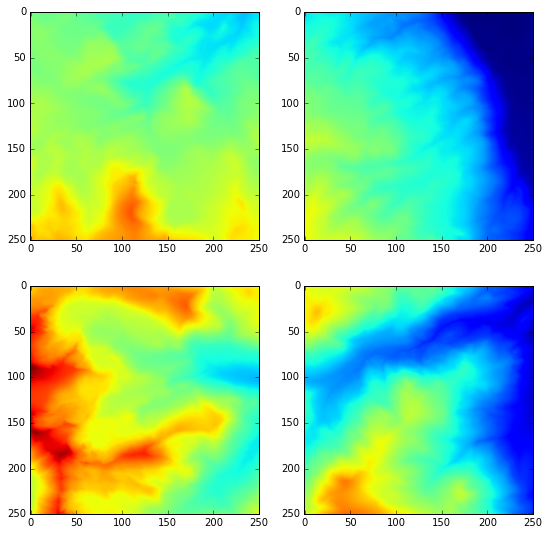

In [125]:
fig = plt.figure(figsize=(9.0, 9.0))

axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

vmin = topo.min()
vmax = topo.max()

half_len = len(topo)/2

axes1.imshow(topo[:half_len, :half_len], vmin=vmin, vmax=vmax)

axes2.imshow(topo[:half_len, half_len:], vmin=vmin, vmax=vmax)

axes3.imshow(topo[half_len:, :half_len], vmin=vmin, vmax=vmax)

axes4.imshow(topo[half_len:, half_len:], vmin=vmin, vmax=vmax)

plt.show(fig)